# Trabalho Final de Prática em Ciência de Dados

**Data: junho de 2024**

**Professor: Elias Salomão Helou Neto**

**Aluna: Lua Nardi Quito nº11371270**

## Introdução
###### Sobre os dados
O conjunto de dados escolhido no trabalho foi retirado do [Kaggle](https://www.kaggle.com/datasets/waleedejaz/predict-students-dropout-and-academic-success). 

O _dataset_ foi criado em um projeto que visa contribuir para a redução da desistência acadêmica e da reprovação no ensino superior, usando técnicas de aprendizado de máquina para identificar alunos em risco em um estágio inicial de sua trajetória acadêmica, para que estratégias de apoio possam ser implementadas.

O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno - trajetória acadêmica, dados demográficos e fatores socioeconômicos.

O problema é formulado como uma tarefa de classificação em três categorias (desistente, matriculado e graduado) no final da duração normal do curso.

Os dados contém 36 features, 1 variável target e 4424 linhas.

O objetivo do trabalho é aplicar à esses dados técnicas de análise de dados e _Machine Learning_, que foram aprendidas durante as aulas da matéria, bem como durante o curso todo.

###### Metodologia:
• Realizar a análise exploratória e limpeza do conjunto de dados (possível remoção de dados faltantes ou de features ruins para a predição);

• Aplicação de modelos de classificação (como KNN, Árvores de decisão, Random Forest) e técnicas de seleção de hiperparâmetros (cross-validation);

• Avaliação e comparação da eficiência dos modelos selecionados utilizando métricas de avaliação (como: acurácia, precisão, recall e F1-Score).

In [104]:
#Importando as bibliotecas que vão ser necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, f1_score

In [125]:
df = pd.read_csv('data.csv', sep = ";") #lendo so dados
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [126]:
print(df.shape)

(4424, 37)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Limpeza dos dados e seleção de _features_
Os dados não possuem valores faltantes e já estão "limpos", porém muitas das _features_ presentes neles não são muito boas para a construção de um modelo e para interpretabilidade dele. Eu removi várias _features_ que não julguei serem boas depois de analisá-las uma-a-uma com cuidado. Não vou passar uma-a-uma aqui na versão final do trabalho porque isso tomaria muito espaço do trabalho, então vou só mostrar alguns exemplos de _features_ que eu removi e minha justificativa para fazê-lo.

Um dos problemas iniciais que tive trabalhando com esses dados é que muitas das _features_ possuem péssima interpretabilidade, devido ao fato de que os dados no Kaggle não vieram com uma legenda explicando o que cada _feature_ significava. E, para piorar, as _features_ categóricas já estão _encoded_ (estão convertidas em formato numérico) de maneira aparentemente completamente aleatória. Por exemplo, a coluna "Mother's occupation", que eu deduzo que contenha as informações da profissão da mãe do aluno no momento que o aluno ingressou na faculdade, contém apenas números. Cada número representando uma profissão, mas eu não tenho como saber que número representa cada profissão então praticamente não há como tirar informação desses dados. Sem falar que é uma variável tecnicamente **categórica nominal** mas com uma quantidade absurda de categorias, o que não é bom para o treinamento do modelo. Já que, se eu fosse usar, por exemplo a técnica de _one-hot-encoding_ isso resultaria em uma quantidade muito grande de _features_ adicionais, provavelmente teríamos mais _features_ do que linhas nos dados, considerando a quantidade imensa de _features_ categóricas que tem nesses dados com esse mesmo problema de possuir uma quantidade excessiva de categorias.

Exemplo utilizando a _feature_ "Mother's occupation":

In [5]:
df["Mother's occupation"].value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: Mother's occupation, dtype: int64

Categorias extremamante desbalanceadas.

In [6]:
df["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], dtype=int64)

O que são esses números? Será que há uma lógica, tipo uma ordenação? Não tenho como saber =(

In [7]:
l = 0
for i in df["Mother's occupation"].unique():
    l += 1
print(l)

32


São muitas categorias diferentes e sem ordenação!!

Outro exemplo com a _feature_ "Previous qualification"

In [8]:
df["Previous qualification"].value_counts()

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

_Features_ com esse mesmo problema de falta de interpretabilidade e/ou categorias excessivas que eu nem sei como foram _encoded_ incluem: Nacionality, Course, Application mode, Application order, Displaced, Father's qualification, Mother's qualification, entre outras. Há também _features_ redundantes como as várias Curricular units 1st/2nd sem, algumas das quais eu nem sei o que significam mas paracem todas se referir ao aproveitamento das matérias pelos alunos em cada semestre. As _features_ Nacionality e International também são redundantes, já que a informação mais valiosa que podemos tirar da _feature_ Nacionality é se o aluno é estrangeiro ou não, que já é mostrada na _feature_ International de forma dicotômica ao invés de um monte de categorias diferentes pra cada país de origem.

In [9]:
df['Nacionality'].value_counts()

1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: Nacionality, dtype: int64

In [10]:
df['International'].value_counts()

0    4314
1     110
Name: International, dtype: int64

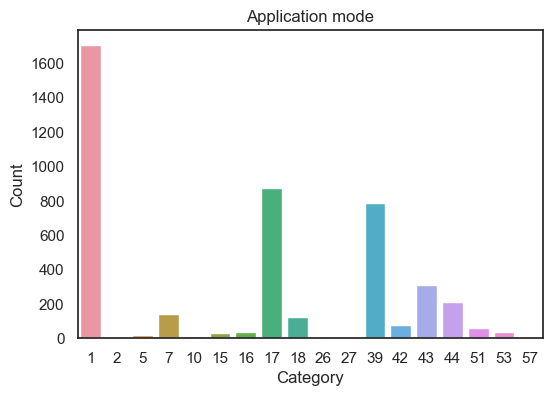

In [132]:
plt.figure(figsize=(6, 4)) 
sns.set(style="white")
sns.countplot(x='Application mode', data=df)
plt.title('Application mode')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Como existem tantos métodos de aplicação???? O que são esses métodos?

Criando um novo _dataset_ apenas com as _features_ selecionadas:

In [12]:
cat = ["Father's occupation", "Mother's occupation","Father's qualification","Mother's qualification",
      "Application mode", "Application order", 'Course', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)',
      'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)',
      "Curricular units 2nd sem (without evaluations)", "Nacionality", "Previous qualification", 'Displaced']
df = df.drop(cat, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Daytime/evening attendance	          4424 non-null   int64  
 2   Previous qualification (grade)       4424 non-null   float64
 3   Admission grade                      4424 non-null   float64
 4   Educational special needs            4424 non-null   int64  
 5   Debtor                               4424 non-null   int64  
 6   Tuition fees up to date              4424 non-null   int64  
 7   Gender                               4424 non-null   int64  
 8   Scholarship holder                   4424 non-null   int64  
 9   Age at enrollment                    4424 non-null   int64  
 10  International                        4424 non-null   int64  
 11  Curricular units 1st sem (enro

In [14]:
print(df.shape)

(4424, 21)


## Análise Exploratória dos dados

In [15]:
df.describe()

,Marital status,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,0.890823,132.613314,126.978119,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,6.270570,4.706600,10.640822,6.232143,4.435805,10.230206,11.566139,1.228029,0.001969
std,0.605747,0.311897,13.188332,14.482001,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.480178,3.094238,4.843663,2.195951,3.014764,5.210808,2.663850,1.382711,2.269935
min,1.000000,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,125.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,5.000000,3.000000,11.000000,5.000000,2.000000,10.750000,9.400000,0.300000,-1.700000
50%,1.000000,1.000000,133.100000,126.100000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,6.000000,5.000000,12.285714,6.000000,5.000000,12.200000,11.100000,1.400000,0.320000
75%,1.000000,1.000000,140.000000,134.800000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,7.000000,6.000000,13.400000,7.000000,6.000000,13.333333,13.900000,2.600000,1.790000
max,6.000000,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,26.000000,26.000000,18.875000,23.000000,20.000000,18.571429,16.200000,3.700000,3.510000


Os dados continuam tendo muitas variáveis categóricas.

In [16]:
df['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

Vou dicotomizar essa variável para 1-solteiro 0-outros

In [17]:
df['Single'] = df['Marital status'].map({1: 1, 2: 0, 3: 0,4: 0,5: 0, 6: 0})

In [18]:
df = df.drop(['Marital status'], axis=1)

In [19]:
cols = ['Single'] + [col for col in df.columns if col != 'Single'] #colocando a nova coluna single no início do dataframe
df = df[cols]

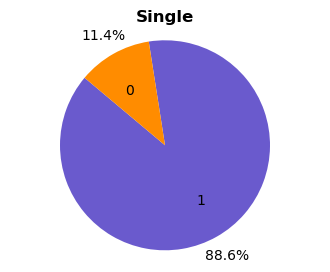

In [20]:
category_counts = df['Single'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('Single', weight='bold')
plt.axis('equal') 
plt.show()

In [21]:
df = df.rename(columns={'Daytime/evening attendance\t': 'Daytime'})

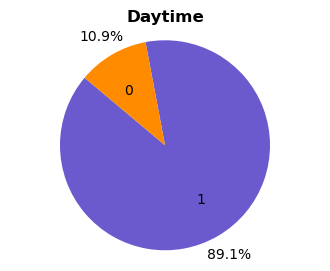

In [22]:
category_counts = df['Daytime'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('Daytime', weight='bold')
plt.axis('equal') 
plt.show()

Onde 1 é diurno e 0 é noturno por dedução.

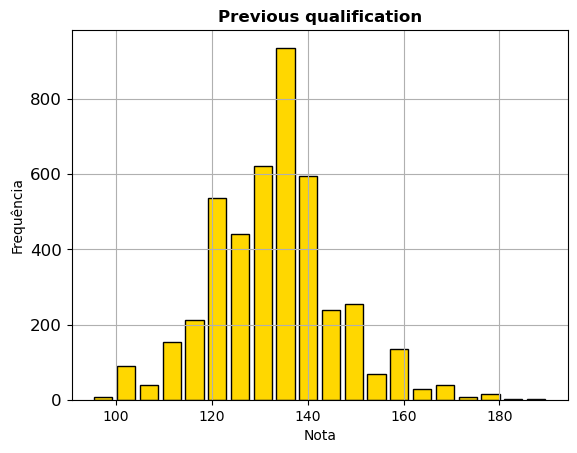

In [23]:
ax = df['Previous qualification (grade)'].hist(grid=True, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='gold', # Color of the bins
                        rwidth=0.8 # Space between bins
                       )

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('Previous qualification',
             weight='bold') 

# Add label names
ax.set_xlabel('Nota')
ax.set_ylabel('Frequência')

# Show the plot
plt.show()

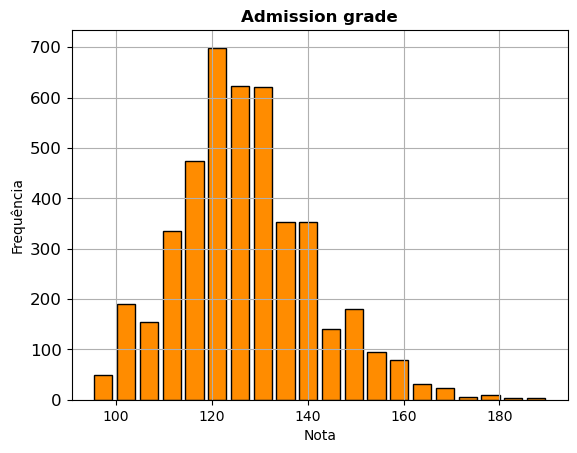

In [24]:
ax = df['Admission grade'].hist(grid=True, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='darkorange', # Color of the bins
                        rwidth=0.8 # Space between bins
                       )

ax.set_title('Admission grade',
             weight='bold') 
ax.set_xlabel('Nota')
ax.set_ylabel('Frequência')
plt.show()

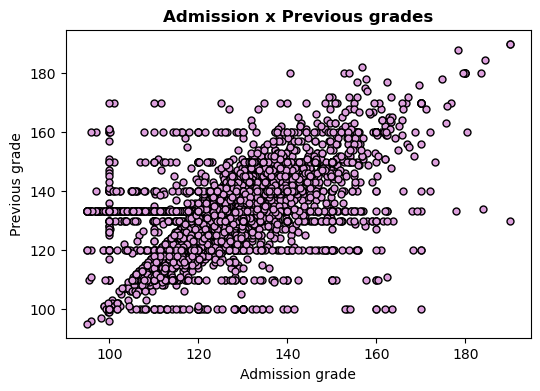

In [25]:
plt.figure(figsize=(6, 4))
plt.xlabel('Admission grade')
plt.ylabel('Previous grade')
plt.title('Admission x Previous grades', weight = 'bold')
plt.plot('Admission grade', 'Previous qualification (grade)', data=df, linestyle='none', markerfacecolor='plum', 
         marker=".", markeredgecolor="black", markersize=10)
plt.show()

In [26]:
p = df['Admission grade'].corr(df['Previous qualification (grade)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.5804441978785276


In [27]:
spearman_corr, p_value = spearmanr(df['Admission grade'], df['Previous qualification (grade)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.5846242923883161


Coeficiente de correlação de Pearson entre as notas de admissão e qualificação. Percebemos uma correlação positiva média.

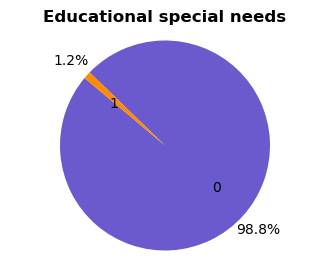

In [28]:
category_counts = df['Educational special needs'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('Educational special needs', weight='bold')
plt.axis('equal') 
plt.show()

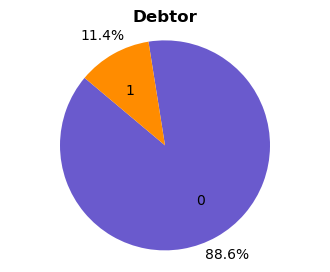

In [29]:
category_counts = df['Debtor'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('Debtor', weight='bold')
plt.axis('equal') 
plt.show()

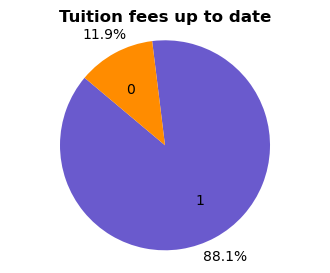

In [30]:
category_counts = df['Tuition fees up to date'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('Tuition fees up to date', weight='bold')
plt.axis('equal') 
plt.show()

Para calcular a correlação entre duas variáveis categóricas utilizamos a tabela de contingência da relação entre as duas variáveis e com ela calculamos o coeficiente de Phi.

In [31]:
# Criando a tabela de contingência
contingency_table = pd.crosstab(df['Debtor'], df['Tuition fees up to date'])

# Calculando a estatística qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculando o coeficiente de Phi
phi_coefficient = np.sqrt(chi2 / df.shape[0])

print("Phi coefficient:", phi_coefficient)

Phi coefficient: 0.407355862383945


Também observa-se uma correlação positiva media entre alunos devedores e os que NÃO estão com a mensalidade da faculdade em dia. O que faz sentido intuitivo.

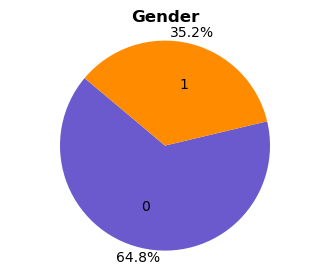

In [32]:
category_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=.6)
plt.title('Gender', weight='bold')
plt.axis('equal') 
plt.show()

A convenção mais comum é 0: Female 1: Male, então vou assumir que os dados estão seguindo dessa forma também e a faculdade em questão tem uma predominância de mulheres.

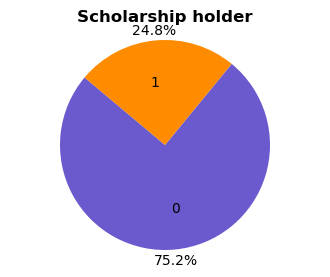

In [33]:
category_counts = df['Scholarship holder'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=.6)
plt.title('Scholarship holder', weight='bold')
plt.axis('equal') 
plt.show()

1 - alunos que possuem bolsa de estudos

0 - caso contrário

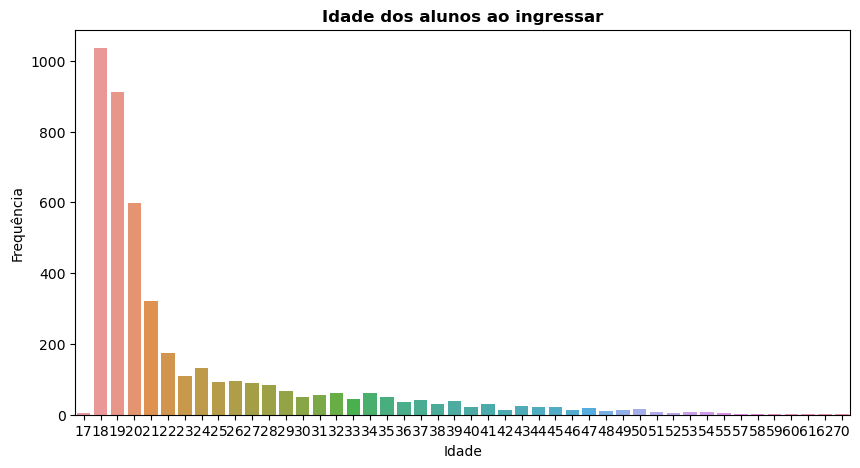

In [34]:
plt.figure(figsize=(10, 5)) 
sns.countplot(x='Age at enrollment', data=df)
plt.title('Idade dos alunos ao ingressar', weight = 'bold')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

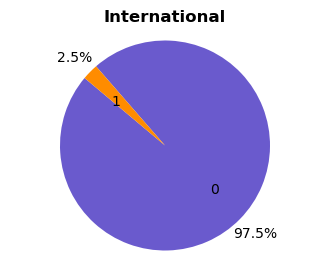

In [35]:
category_counts = df['International'].value_counts()
plt.figure(figsize=(4, 3))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange'], 
        autopct='%1.1f%%', startangle=140, pctdistance=1.2, labeldistance=.6)
plt.title('International', weight='bold')
plt.axis('equal') 
plt.show()

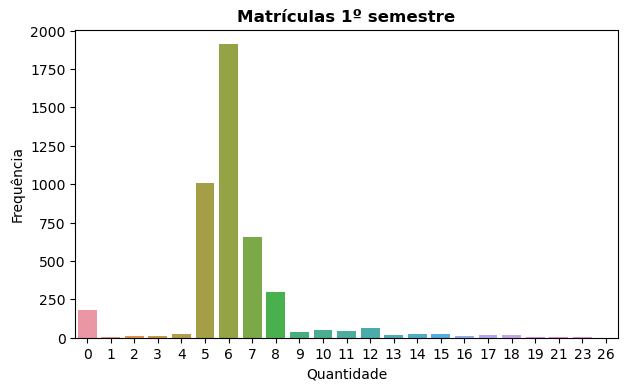

In [36]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Curricular units 1st sem (enrolled)', data=df)
plt.title('Matrículas 1º semestre', weight = 'bold')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

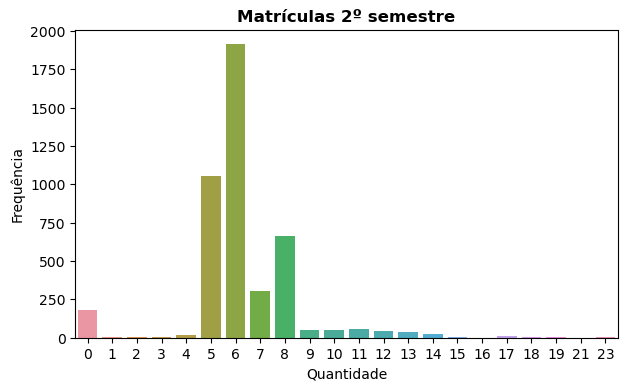

In [37]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Curricular units 2nd sem (enrolled)', data=df)
plt.title('Matrículas 2º semestre', weight = 'bold')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

In [38]:
p = df['Curricular units 2nd sem (enrolled)'].corr(df['Curricular units 1st sem (enrolled)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.9426266930159168


In [39]:
spearman_corr, pvalue = spearmanr(df['Curricular units 2nd sem (enrolled)'], df['Curricular units 1st sem (enrolled)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.9618260766381487


A correlação entre essas duas variáveis é tão alta que talvez seja melhor remover uma delas para fazer o ajuste do modelo.

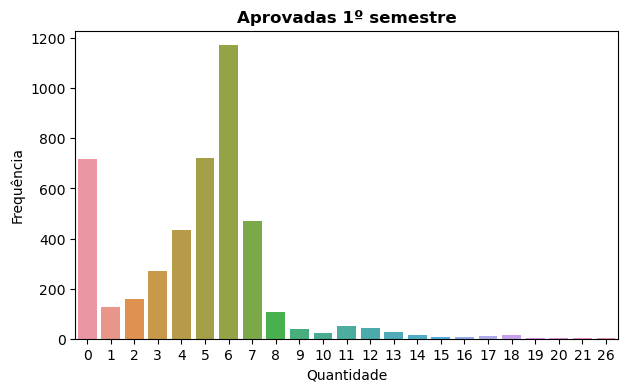

In [40]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Curricular units 1st sem (approved)', data=df)
plt.title('Aprovadas 1º semestre', weight = 'bold')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

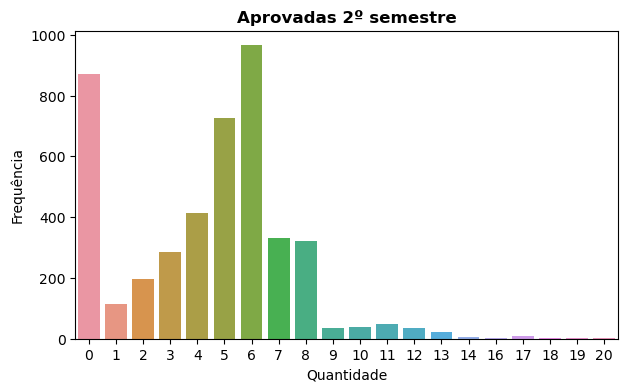

In [41]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Curricular units 2nd sem (approved)', data=df)
plt.title('Aprovadas 2º semestre', weight = 'bold')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

In [42]:
p = df['Curricular units 2nd sem (approved)'].corr(df['Curricular units 1st sem (approved)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.9040021013038974


In [43]:
spearman_corr, pvalue = spearmanr(df['Curricular units 2nd sem (approved)'], df['Curricular units 1st sem (approved)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.8916792101746502


Mais uma vez uma correlação bem alta.

In [44]:
p = df['Curricular units 1st sem (enrolled)'].corr(df['Curricular units 1st sem (approved)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.7690834766824158


In [45]:
spearman_corr, pvalue = spearmanr(df['Curricular units 1st sem (enrolled)'], df['Curricular units 1st sem (approved)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.706554906403963


In [46]:
p = df['Curricular units 2nd sem (enrolled)'].corr(df['Curricular units 2nd sem (approved)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.7032580730157239


In [47]:
spearman_corr, pvalue = spearmanr(df['Curricular units 2nd sem (enrolled)'], df['Curricular units 2nd sem (approved)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.6741693826137587


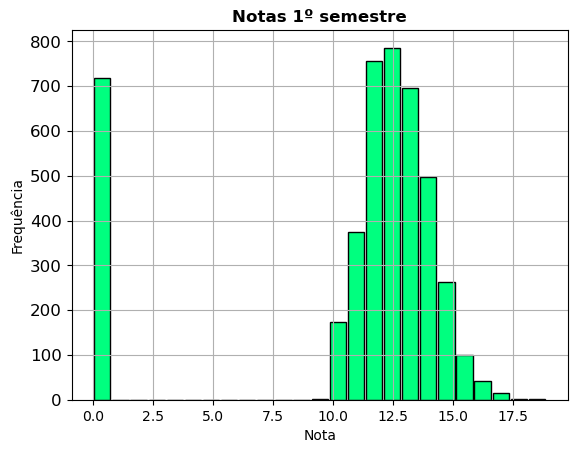

In [48]:
ax = df['Curricular units 1st sem (grade)'].hist(grid=True, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=25, # Number of bins
                        edgecolor='black', # Color of the border
                        color='springgreen', # Color of the bins
                        rwidth=0.9 
                       )

ax.set_title('Notas 1º semestre',
             weight='bold') 
ax.set_xlabel('Nota')
ax.set_ylabel('Frequência')
plt.show()

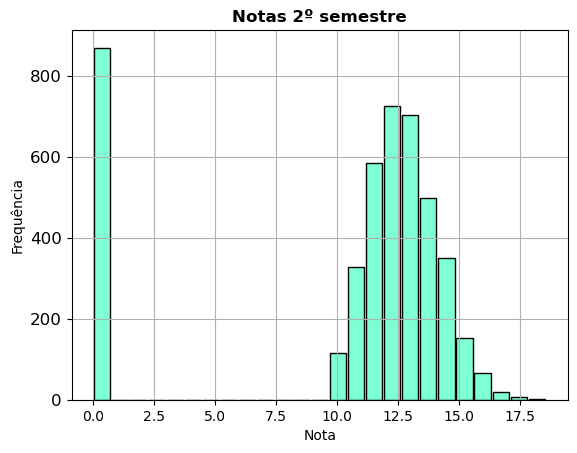

In [49]:
ax = df['Curricular units 2nd sem (grade)'].hist(grid=True, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=25, # Number of bins
                        edgecolor='black', # Color of the border
                        color='aquamarine', # Color of the bins
                        rwidth=0.9 
                       )

ax.set_title('Notas 2º semestre',
             weight='bold') 
ax.set_xlabel('Nota')
ax.set_ylabel('Frequência')
plt.show()

In [50]:
p = df['Curricular units 1st sem (grade)'].corr(df['Curricular units 2nd sem (grade)'])
print("Pearson coefficient:", p)

Pearson coefficient: 0.8371697405958246


In [51]:
spearman_corr, pvalue = spearmanr(df['Curricular units 1st sem (grade)'], df['Curricular units 2nd sem (grade)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.7623560353227239


In [52]:
p = df['Curricular units 1st sem (grade)'].corr(df['Curricular units 1st sem (approved)']) #testar coeficiente de Spearman
print("Pearson coefficient:", p)

Pearson coefficient: 0.6961132697921109


In [53]:
spearman_corr, pvalue = spearmanr(df['Curricular units 1st sem (grade)'], df['Curricular units 1st sem (approved)'])
print("Spearman coefficient:", spearman_corr)

Spearman coefficient: 0.639785334777196


In [54]:
df = df.rename(columns={'Curricular units 1st sem (enrolled)': '1st enrolled', 'Curricular units 1st sem (approved)':
                       '1st approved', 'Curricular units 1st sem (grade)': '1st grade', 
                        'Curricular units 2nd sem (enrolled)': '2nd enrolled', 'Curricular units 2nd sem (approved)':
                       '2nd approved', 'Curricular units 2nd sem (grade)': '2nd grade', })

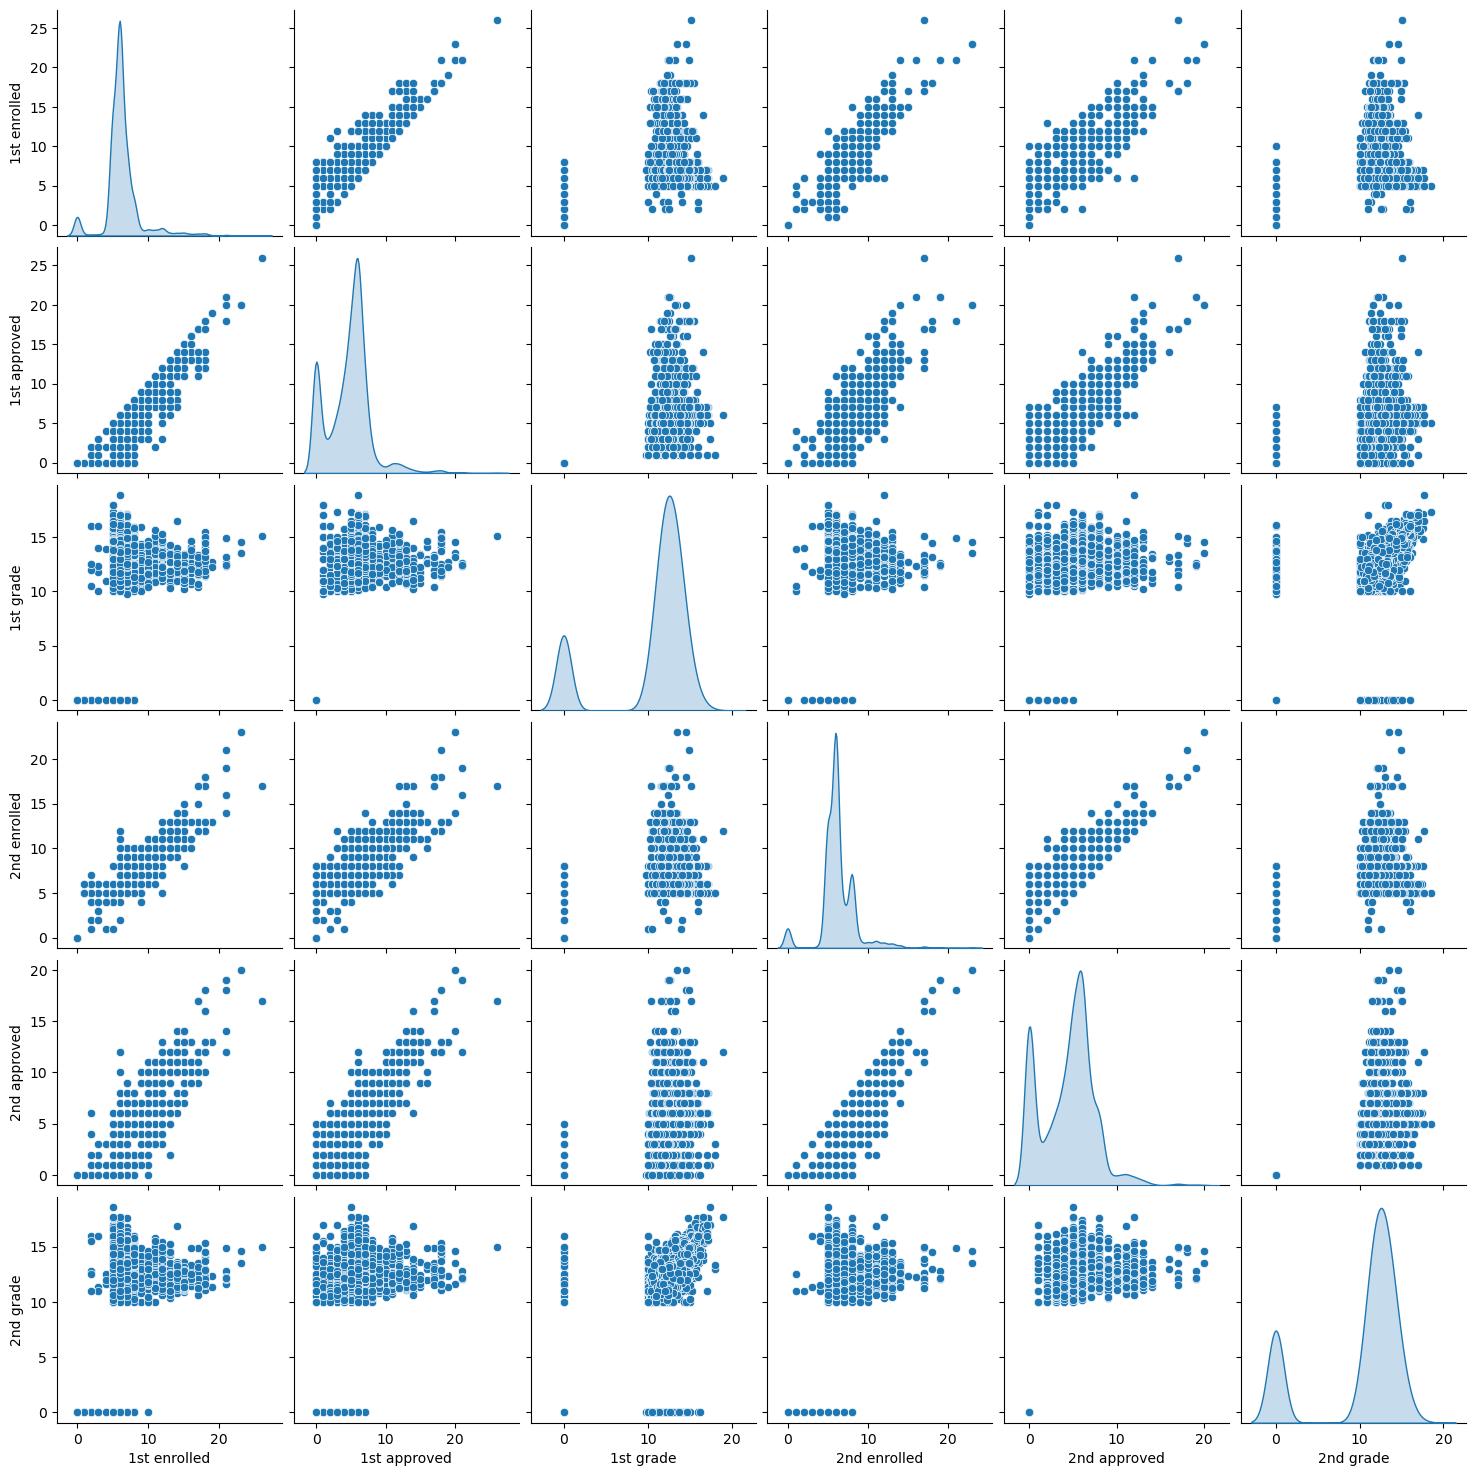

In [55]:
selected_columns = ['1st enrolled', '1st approved', '1st grade', '2nd enrolled', '2nd approved', '2nd grade']
df_selected = df[selected_columns]
sns.pairplot(df_selected, diag_kind='kde')
plt.show()

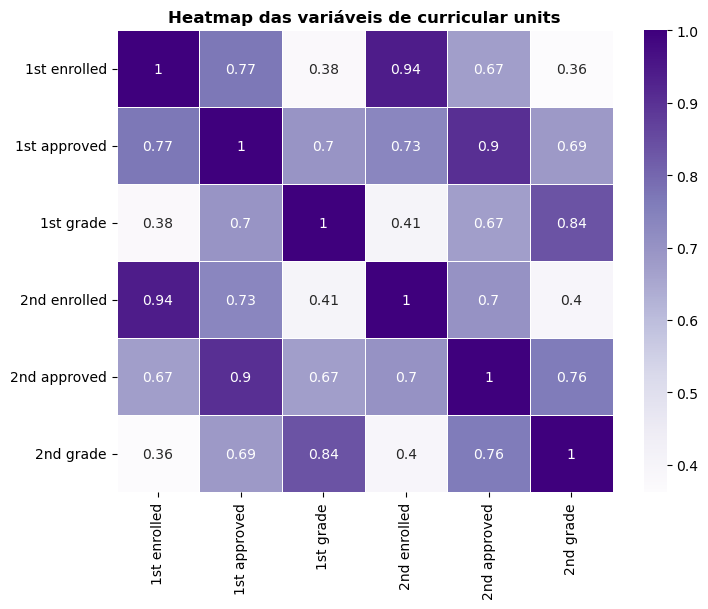

In [56]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=0.5)
plt.title('Heatmap das variáveis de curricular units', weight = 'bold')
plt.show()

Observa-se uma correlação mais alta entre as variáveis de mesmo tipo, só variando o semestre. Indicando que o desempenho acadêmico dos alunos de um semestre para o outro não mudou muito

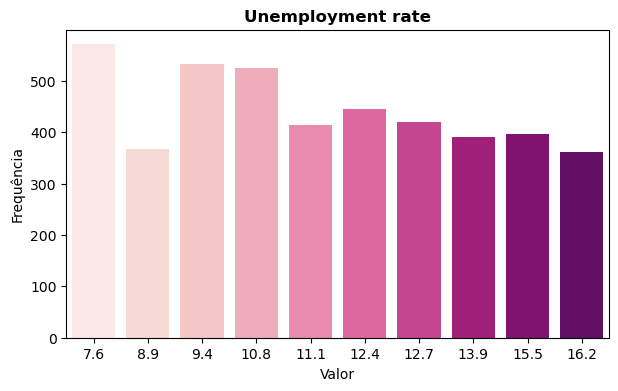

In [57]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Unemployment rate', data=df, palette='RdPu')
plt.title('Unemployment rate', weight = 'bold')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

É uma variável numérica contínua mas só assume 10 valores diferentes. Provavelmente porque a variável representa a taxa de desemprego no ano em que o aluno ingressou na faculdade, e os dados só contém alunos que ingressaram em 10 anos distintos.

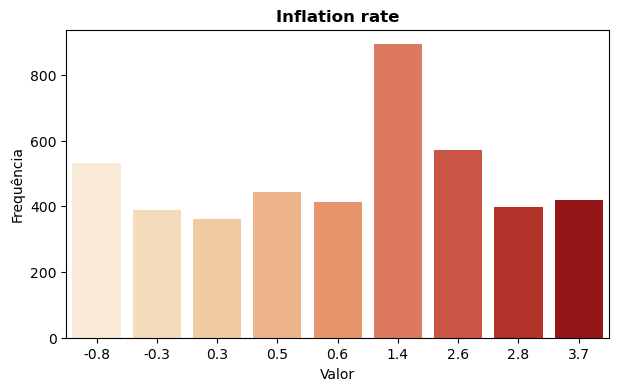

In [58]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='Inflation rate', data=df, palette = 'OrRd')
plt.title('Inflation rate', weight = 'bold')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

Essa só assume 9 valores distintos.

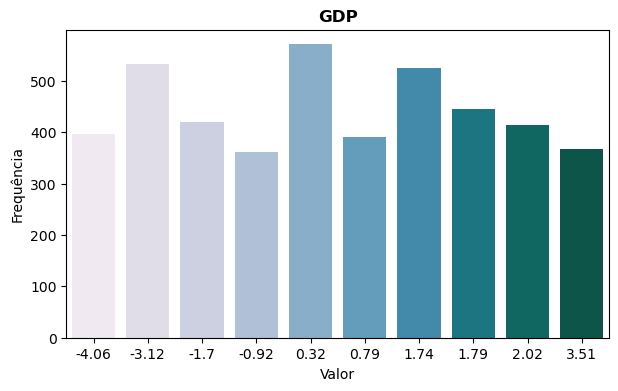

In [59]:
plt.figure(figsize=(7, 4)) 
sns.countplot(x='GDP', data=df, palette = 'PuBuGn')
plt.title('GDP', weight = 'bold')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

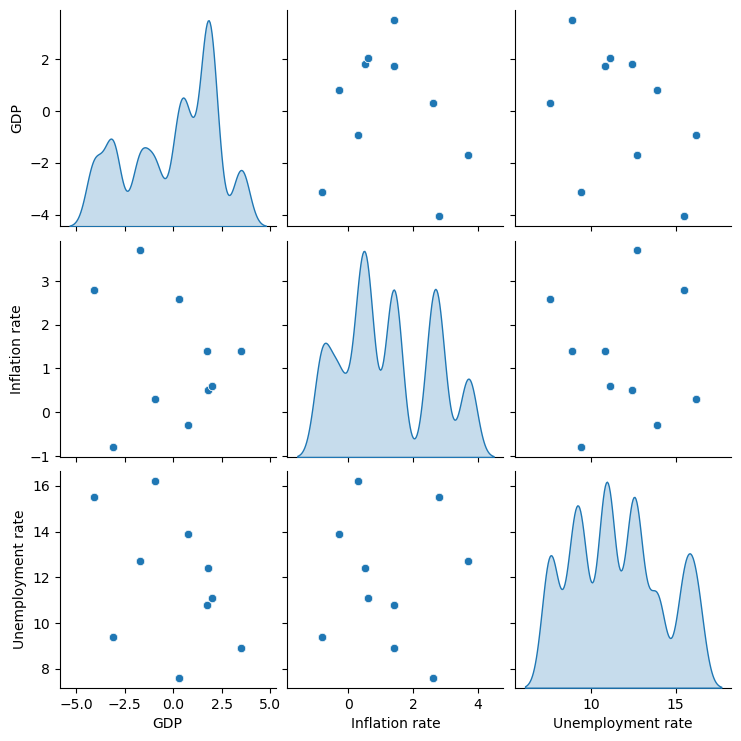

In [60]:
selected_columns = ['GDP', 'Inflation rate', 'Unemployment rate']
df_selected = df[selected_columns]
sns.pairplot(df_selected, diag_kind='kde')
plt.show()

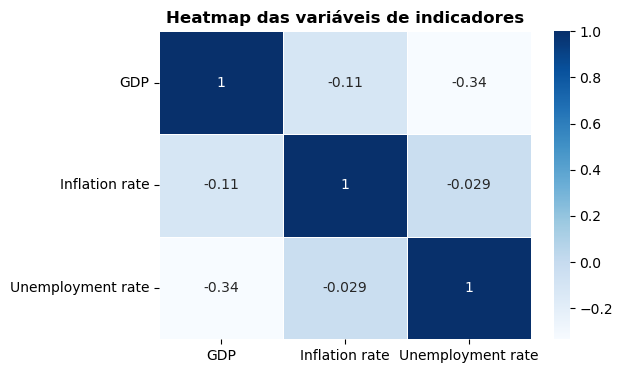

In [61]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap das variáveis de indicadores', weight = 'bold')
plt.show()

In [62]:
df = df.rename(columns={'Previous qualification (grade)': 'Previous grade'})

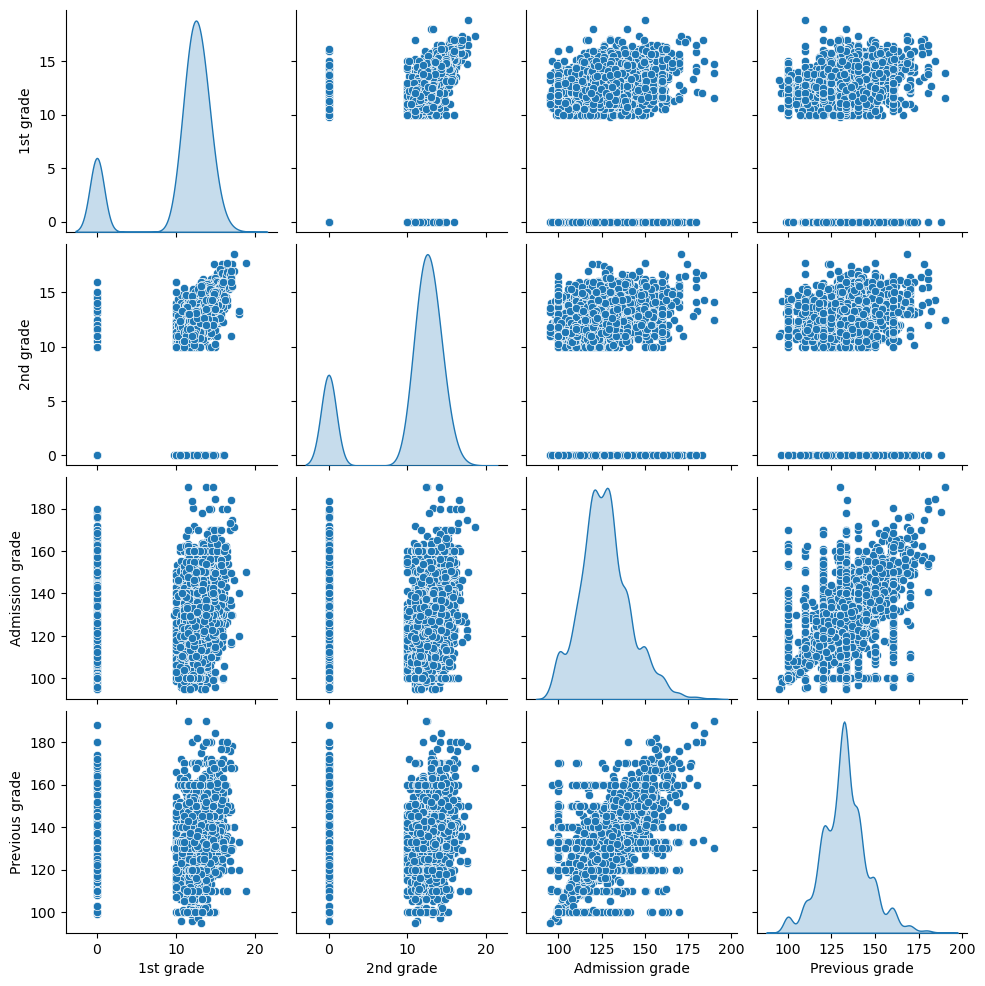

In [63]:
selected_columns = ['1st grade', '2nd grade', 'Admission grade', 'Previous grade', ]
df_selected = df[selected_columns]
sns.pairplot(df_selected, diag_kind='kde')
plt.show()

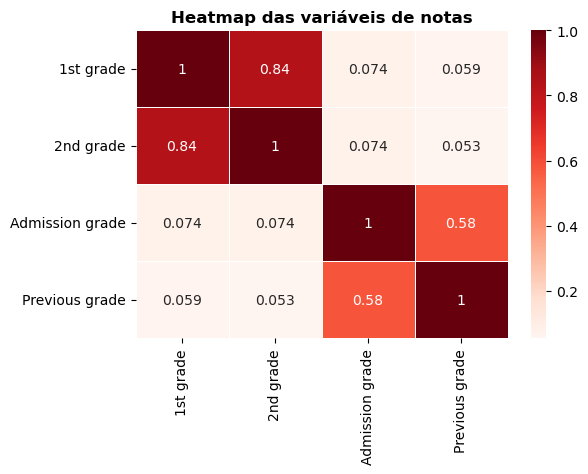

In [64]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0.5)
plt.title('Heatmap das variáveis de notas', weight = 'bold')
plt.show()

Praticamente nenhuma correlação entre as notas dos semestres com as notas prévias. Provavelmente devido a quantidade inflacionada de zeros nas distribuições das notas dos semestres.

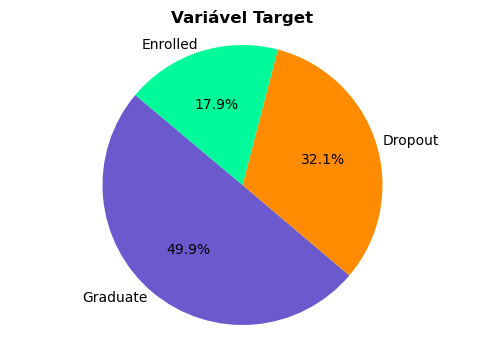

In [65]:
category_counts = df['Target'].value_counts()
plt.figure(figsize=(6, 4))  
plt.pie(category_counts, labels=category_counts.index, colors=['slateblue', 'darkorange', 'mediumspringgreen'], 
        autopct='%1.1f%%', startangle=140, labeldistance=1.05)
plt.title('Variável Target', weight = 'bold')
plt.axis('equal') 
plt.show()

A variável resposta possui 3 categorias e não são muito balanceadas. "Graduate" se refere aos alunos que se formaram no tempo normal, "Dropout" são os alunos que largaram o curso e "Enrolled" são os alunos que ainda estão cursando o curso após o tempo de duração normal do curso e portanto ainda tem chance de virarem desistentes.

##  Aplicação de algorítmos de classificação

###### Algorítmo KNN (K-neighbors classifier)

Primeiro vou realizar a preparação do _dataframe_ padronizando algumas _features_ para melhorar as predições em algorítimos como o KNN que utiliza a distância entre os dados para realizar suas predições.

Separação das _features_ entre as que necessitam padronização e as que não necessitam (as binárias):

In [66]:
Binarias = ['Single', 'Daytime', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
            'International']
Numericas = ['Previous grade', 'Admission grade', 'Age at enrollment', '1st enrolled', '1st approved', '1st grade', 
            '2nd enrolled', '2nd approved', '2nd grade', 'Unemployment rate', 'Inflation rate', 'GDP']

O StandardScaler do scikit-learn realiza a padronização (também conhecida como normalização Z-score), que transforma os dados para terem média 0 e desvio padrão 1.

In [67]:
scaler = StandardScaler()
df[Numericas] = scaler.fit_transform(df[Numericas])
df_combined = pd.concat([df[Numericas], df[Binarias]], axis=1)
df_combined['Target'] = df['Target']

In [68]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Previous grade             4424 non-null   float64
 1   Admission grade            4424 non-null   float64
 2   Age at enrollment          4424 non-null   float64
 3   1st enrolled               4424 non-null   float64
 4   1st approved               4424 non-null   float64
 5   1st grade                  4424 non-null   float64
 6   2nd enrolled               4424 non-null   float64
 7   2nd approved               4424 non-null   float64
 8   2nd grade                  4424 non-null   float64
 9   Unemployment rate          4424 non-null   float64
 10  Inflation rate             4424 non-null   float64
 11  GDP                        4424 non-null   float64
 12  Single                     4424 non-null   int64  
 13  Daytime                    4424 non-null   int64

In [69]:
#Definindo quais são as features e qual é a variável de interesse
X = df_combined.drop(columns='Target')
y = df_combined['Target']

In [70]:
#Dividindo o conjunto de treino e o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [71]:
X_train = X_train.values  # Convertendo os DataFrames para numpy arrays
X_test = X_test.values

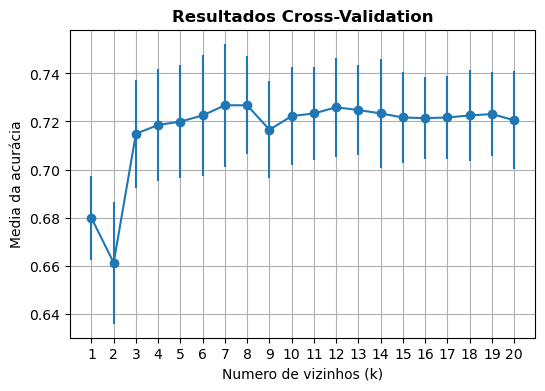

In [72]:
#Aplicação de cross-validation para descobrir o melhor k do KNN
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']
k_values = np.arange(1, 21)

plt.figure(figsize=(6, 4)) 
plt.errorbar(k_values, mean_test_scores, yerr=std_test_scores, marker='o', linestyle='-')
plt.title('Resultados Cross-Validation', weight = 'bold')
plt.xlabel('Numero de vizinhos (k)')
plt.ylabel('Media da acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [73]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 7}
Best Score: 0.7267556918582678


In [74]:
#Aplicação do algorítmo com o melhor k
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))
print()
print("KNN Classification report:")
print(classification_report(y_test, y_pred))

KNN Matriz de confusão:
[[200  37  58]
 [ 44  40  88]
 [ 17  22 379]]

KNN Classification report:
              precision    recall  f1-score   support

     Dropout       0.77      0.68      0.72       295
    Enrolled       0.40      0.23      0.30       172
    Graduate       0.72      0.91      0.80       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.61       885
weighted avg       0.67      0.70      0.68       885



Explicação da matriz de confusão: seus valores são utilizados para calcular as métricas seguintes que aparecem nos resultados das predições do algorítmo. O que cada posição na matriz representa:

a11 = dropout era a resposta correta e o algoritmo preveu dropout

a12 = dropout era a resposta correta e o algoritmo preveu enrolled

a13 = dropout era a resposta correta e o algoritmo preveu graduate

a21 = enrolled era a resposta correta e o algoritmo preveu dropout

a22 = enrolled era a resposta correta e o algoritmo preveu enrolled

a23 = enrolled era a resposta correta e o algoritmo preveu graduate

a31 = graduate era a resposta correta e o algoritmo preveu dropout

a32 = graduate era a resposta correta e o algoritmo preveu enrolled

a33 = graduate era a resposta correta e o algoritmo preveu graduate

TP - true positive (verdadeiro positivo)

FN - false negative (falso negativo)

TN - true negative (verdadeiro negativo)

FP - false positive (falso positivo)

esses valores são calculados para cada classe, como temo 3 classes no problema. Quando estamos avaliando em uma classes, as outras duas classes se tornam as "negativas" e a que estamos avaliando é a "positiva"

_Precision_ é calculada como TP/(TP + FP)

_recall_ é calculada como TP/(TP + FN)

_f1 score_ é calculado como 2x(_precision_ x _recall_)/(_precision_ + _recall_)

e suporte é a quantidade de valores totais de cada classe em y_test

###### Árvore de decisões (Decision Trees)

Eu vou repetir a mesma coisa que fiz com KNN agora com vários outros modelos. Vou omitir comentários e explicações pq é análogo ao que ja foi explicado.

In [75]:
#Cross validation para definir os melhores hiperparâmetros para o modelo

param_grid_dt = {
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=30), param_grid_dt, cv=6, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Melhores parametros e accuracy para árvore de decisões
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters:", best_params_dt)
print()
print("Best Cross-Validation Score:", best_score_dt)

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}

Best Cross-Validation Score: 0.7434332824954678


In [76]:
dt = DecisionTreeClassifier(**best_params_dt, random_state=30)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Matriz de confusão:
[[203  45  47]
 [ 37  66  69]
 [  9  39 370]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.69      0.75       295
    Enrolled       0.44      0.38      0.41       172
    Graduate       0.76      0.89      0.82       418

    accuracy                           0.72       885
   macro avg       0.67      0.65      0.66       885
weighted avg       0.72      0.72      0.72       885



###### Random Forest

In [77]:
#definindo as possiveis escolhas de hiperparametros para o modelo
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
#Cross-validation
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=30),
    param_grid_rf,
    cv=5,
    scoring='accuracy'
)
grid_search_rf.fit(X_train, y_train)

# Melhores parâmetros e score Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest:", best_params_rf)
print()
print("Best Cross-Validation Score for Random Forest:", best_score_rf)

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Best Cross-Validation Score for Random Forest: 0.7773387992552282


In [84]:
# Aplicação Random Forest com os melhores parâmetros
rf = RandomForestClassifier(**best_params_rf, random_state=30)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print()
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Matriz de confusão:
[[226  24  45]
 [ 45  59  68]
 [ 15  22 381]]

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       295
    Enrolled       0.56      0.34      0.43       172
    Graduate       0.77      0.91      0.84       418

    accuracy                           0.75       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.74      0.75      0.74       885



In [86]:
# Feature importance do Random Forest
importances = rf.feature_importances_

# Criar um dataframe para visualização
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenação
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_n = 10  #printar as 10 features mais importantes
print(f"Top {top_n} most important features:")
print(feature_importances.head(top_n))

Top 10 most important features:
                    Feature  Importance
7              2nd approved    0.220967
8                 2nd grade    0.151623
4              1st approved    0.133555
5                 1st grade    0.087090
16  Tuition fees up to date    0.060666
1           Admission grade    0.051938
2         Age at enrollment    0.047352
0            Previous grade    0.041138
6              2nd enrolled    0.035854
3              1st enrolled    0.034672


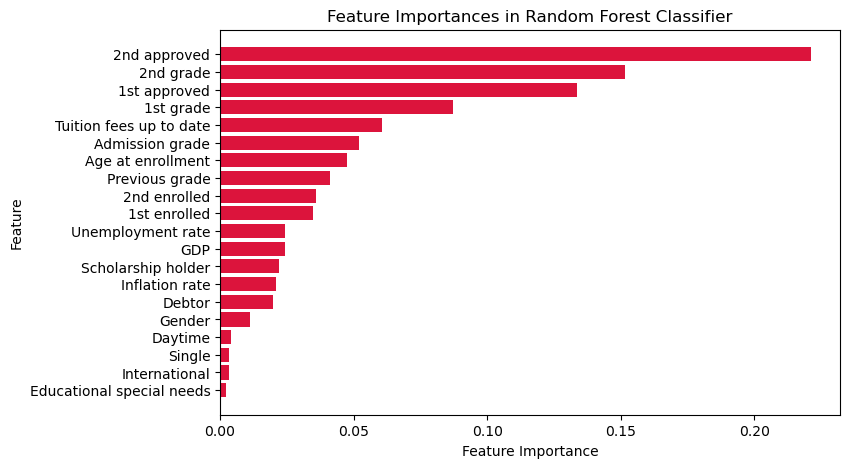

In [109]:
# Plotando os resultandos
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='crimson', align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

Aqui observa-se quais _features_ o modelo _random forest_ julgou serem mais importantes para a predição da variável resposta.

###### SVM

In [79]:
#Cross Validation
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

In [80]:
print("Best Parameters for SVC:", best_params_svc)
print()
print("Best Cross-Validation Score for SVC:", best_score_svc)

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-Validation Score for SVC: 0.7702794492524313


In [81]:
# Aplicação do modelo
svc = SVC(**best_params_svc)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVM Confusion Matrix:
[[215  29  51]
 [ 44  49  79]
 [ 11  13 394]]
SVM Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       295
    Enrolled       0.54      0.28      0.37       172
    Graduate       0.75      0.94      0.84       418

    accuracy                           0.74       885
   macro avg       0.70      0.65      0.66       885
weighted avg       0.73      0.74      0.72       885



###### Regressão Logística

In [82]:
#Cross validation
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print("Best Parameters for Logistic Regression:", best_params_lr)
print()
print("Best Cross-Validation Score for Logistic Regression:", best_score_lr)

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'}

Best Cross-Validation Score for Logistic Regression: 0.7699933673754785


In [83]:
# Treinamento do modelo
lr = LogisticRegression(**best_params_lr,max_iter=1000, multi_class='ovr')
lr.fit(X_train, y_train)

# Predições
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Confusion Matrix:
[[240   4  51]
 [ 64  13  95]
 [ 15   2 401]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.81      0.78       295
    Enrolled       0.68      0.08      0.14       172
    Graduate       0.73      0.96      0.83       418

    accuracy                           0.74       885
   macro avg       0.72      0.62      0.58       885
weighted avg       0.73      0.74      0.68       885



## Tentativa de melhorar as predições usando  _feature selection_

Foi utilizado o método Lasso para fazer a seleção de _features_ mais importantes para o treinamento do modelo.

In [94]:
X = df_combined.drop(columns='Target')
y = df_combined['Target']

# Encode target variable
y = pd.factorize(y)[0]  # Converts 'A', 'B', 'C' to 0, 1, 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

X_train = X_train.values  # Convertendo os DataFrames para numpy arrays
X_test = X_test.values
# Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Get the coefficients of the features
lasso_coef = lasso.coef_

# Select features where the coefficient is non-zero
selected_features = np.where(lasso_coef != 0)[0]
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

print("Selected features:", selected_features)

Selected features: [ 0  2  4  6  7  8  9 11 16]


As _features_ selecionadas foram:

0 - Previous grade

2 - Age at enrollment

4 - 1st approved

6 - 2nd enrolled

7 - 2nd approved

8 - 2nd grade

9 - Unemployment rate

11 - GDP

16 - Tuition fees up to date

Percebe-se que variáveis com alta correlação foram removidas pelo Lasso, como 1st enrolled e 2nd enrolled e 1st grade e 2nd grade (só uma de cada foi selecionada). A excessão a essa regra seria as variáveis 1st approved e 2nd approved que tem 0.9 de correlação de Pearson e mesmo assim foram selecionadas pelo Lasso.

Vou aplicar o random forest já que esse foi o modelo que apresentou a melhor acurácia e _f1 score_ entre todos que foram testados.

In [101]:
#Fazer cross validation de novo por precaução
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=30),
    param_grid_rf,
    cv=5,
    scoring='accuracy'
)
grid_search_rf.fit(X_train_selected, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest:", best_params_rf)
print()
print("Best Cross-Validation Score for Random Forest:", best_score_rf)

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Best Cross-Validation Score for Random Forest: 0.7728234203565636


In [103]:
rf = RandomForestClassifier(**best_params_rf, random_state=30)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       295
           1       0.77      0.91      0.83       418
           2       0.59      0.42      0.49       172

    accuracy                           0.76       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.75      0.76      0.75       885



Houve uma pequena melhoria nas predições do modelo.

In [96]:
#Com regressão logística
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       295
           1       0.72      0.96      0.82       418
           2       0.70      0.09      0.16       172

    accuracy                           0.74       885
   macro avg       0.73      0.62      0.59       885
weighted avg       0.73      0.74      0.68       885



aqui houve melhoria mas ainda não está melhor que o random forest. Observa-se uma predição muito ruim da classe 2 (enrolled) nesse modelo, com uma quantidade alta de FN, visto pelo valor do _recall_ nessa classe.

In [97]:
#Com SVM
svc.fit(X_train_selected, y_train)
y_pred_svc = svc.predict(X_test_selected)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       295
           1       0.74      0.95      0.83       418
           2       0.55      0.33      0.41       172

    accuracy                           0.75       885
   macro avg       0.71      0.66      0.67       885
weighted avg       0.74      0.75      0.73       885



In [98]:
#Com árvores de decisão
dt.fit(X_train_selected, y_train)
y_pred_dt = dt.predict(X_test_selected)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       295
           1       0.72      0.94      0.81       418
           2       0.48      0.30      0.37       172

    accuracy                           0.72       885
   macro avg       0.68      0.63      0.64       885
weighted avg       0.71      0.72      0.70       885



In [99]:
#Com KNN
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
print("KNN Classification report:")
print(classification_report(y_test, y_pred))

KNN Classification report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       295
           1       0.71      0.92      0.80       418
           2       0.42      0.20      0.27       172

    accuracy                           0.70       885
   macro avg       0.63      0.60      0.60       885
weighted avg       0.67      0.70      0.67       885



## Resultados e Conclusão

In [114]:
# Vou montar um dataframe com os resultados de cada modelo — seu f1 score e acurácia
# Define a função que retorna f1 score e acurácia de cada modelo 
def evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test):
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    return accuracy, f1_macro

#modelos
models = {
    'KNN': knn,
    'Random Forest': rf,
    'Decision Tree': dt,
    'SVM': svc,
    'Logistic Regression': lr,
}

results = {} # Dicionário em que serão armazenados os valores
for model_name, model in models.items():
    accuracy, f1_macro = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    results[model_name] = {'Accuracy': accuracy, 'F1 Macro Avg': f1_macro}

# Convertendo os resultados para um Dataframe para visualização
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy', ascending=False) # Ordenação
print(results_df)

                     Accuracy  F1 Macro Avg
Random Forest        0.759322      0.702274
SVM                  0.748023      0.670245
Logistic Regression  0.736723      0.589573
Decision Tree        0.719774      0.640119
KNN                  0.698305      0.595133


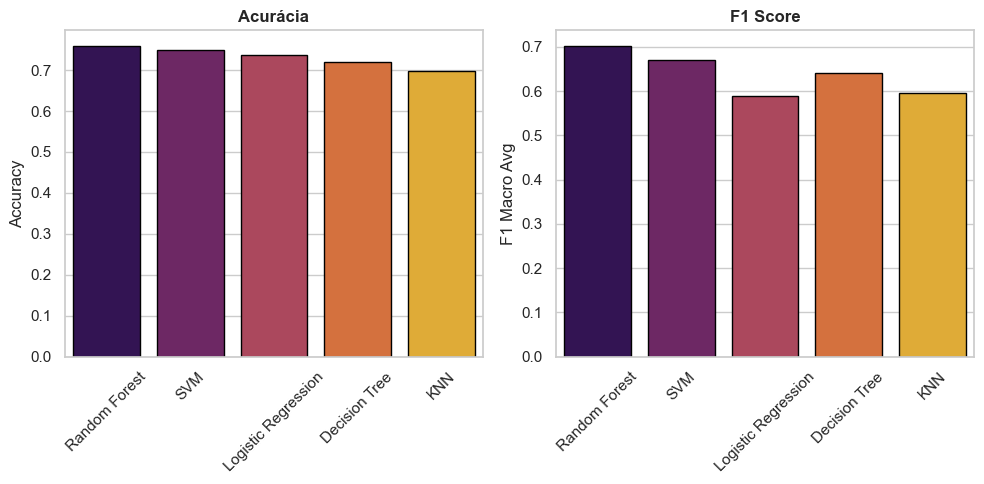

In [123]:
# Plotando os resultados
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Gráficos para a acurácia
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='inferno', edgecolor = 'black')
plt.title('Acurácia', weight = 'bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Gráficos para f1-score
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='F1 Macro Avg', data=results_df, palette='inferno', edgecolor = 'black')
plt.title('F1 Score', weight = 'bold')
plt.ylabel('F1 Macro Avg')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Usei a macro avg invés da weighted avg porque estou lidando com dados desbalanceados e não quero que os resultados saiam enviesados para os modelos que somente conseguem prever bem as classes predominantes (graduate e dropout), por exemplo o modelo de regressão logística, que usou a estratégia clássica de trapacear na predição não prevendo praticamente nenhum aluno como enrolled, que é a classe menos representativa (17.9% dos dados) e mais difícil de prever, com só 19 alunos preditos pela regressão como enrolled, sendo que no conjunto de teste tinham 172 alunos nessa classe. 

Random Forest foi claramente o modelo que se saiu melhor, que não só tem a melhor acurácia entre todos os modelos mas também foi o melhor em prever a classe enrolled (f1 score de 0.49, sendo que o segundo melhor foi o svc com 0.41), que praticamente todos os modelos se saíram muito mal em prever comparado ao desempenho com as outras classes.

A prática de _feature selection_ com o método Lasso não melhorou significativamente as predições dos modelos. Não me dei ao trabalho de repetir o cross-validation com todos os modelos depois da _feature selection_ porque ia tomar muito tempo e espaço, por isso fiz só com o modelo que estava se saindo melhor que é o Random Forest.

De acordo tanto com o Lasso, quanto com as Feature Importances do modelo Random forest, as variáveis que representam o desempenho acadêmico dos alunos na faculdade (1st approved, 1st grade, 2nd approved, 2nd grade) são de grande importância para as predições dos modelo, o que não é surpreendente. Intuitivamente, espera-se que alunos com melhor desempenho vão continuar no curso e os com pior desempenho, desistir. E, ao que parece, os dados reforçam essa ideia.

Os modelos obtiveram boas predições no geral, em especial foram bem capazes de distinguir entre alunos 'graduate' e alunos 'dropout' mas não foram tão bem sucedidos em distinguir essas duas classes da classe 'enrolled'. O que também faz sentido intuitivamente, já que alunos 'enrolled' são tanto alunos 'graduate' em potencial (irão completar o curso, porém com atraso), quanto alunos 'dropout' em potencial (se eles estão cursando o curso atualmente eles ainda podem desistir).